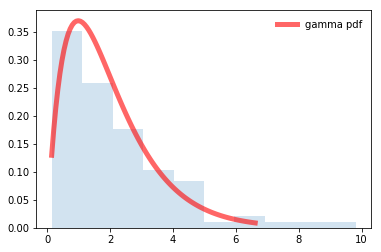

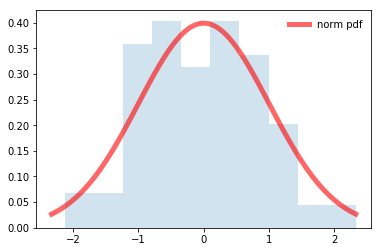

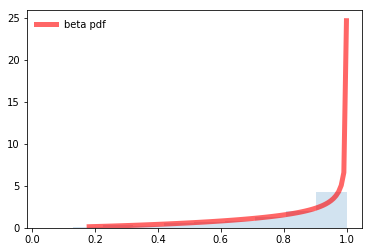

In [20]:
###PRE-CLASS WORK 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

##Gamma Distribution
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)

a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')

r = gamma.rvs(a, size=100)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


##Normal Distribution 
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

r = norm.rvs(size=100)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


##Beta Distribution
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)

a, b = 2.31, 0.627
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')

r = beta.rvs(a, b, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004
00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


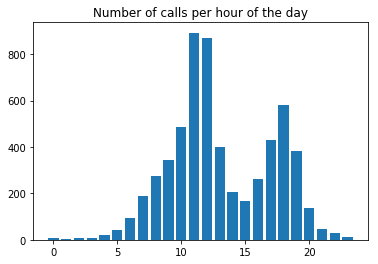

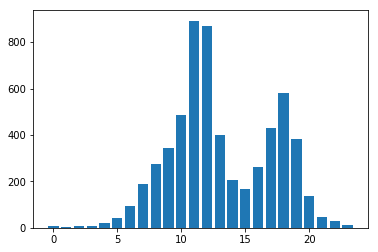

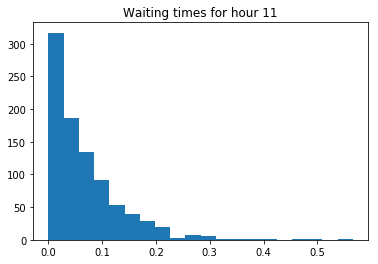

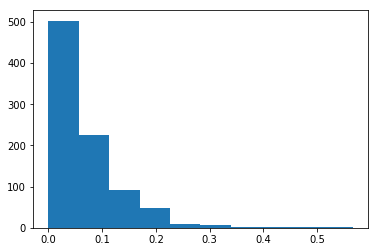

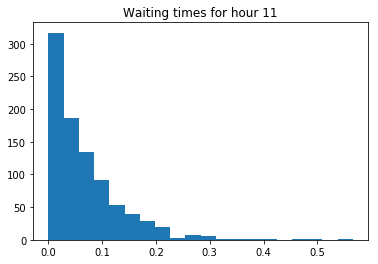

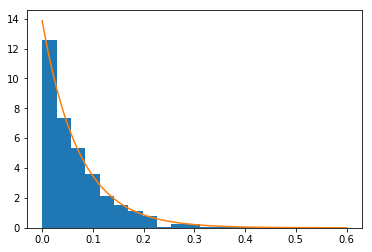

In [55]:
###PRE-CLASS WORK 2

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)


for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))
    

###Task 1: Plot the number of calls per hour

#Method 1 (Prof's)
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

#Method 2 (Ash's)
count_list = [len(_) for _ in waiting_times_per_hour]
dumb = [_ for _ in range(24)]
plt.bar(dumb, count_list)
# plt.xticks(dumb, hour_list)
plt.show()

###Task 2: Plot a histogram of the durations for one hour

#Method 1 (Prof's)
hour_index = 11
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()

#Method 2 (Ash's)
plt.hist(waiting_times_per_hour[11], bins=10) 
plt.show()

#Task 3: Guess the distribution

#Method 1 (Prof's)
hour_index = 11
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()

#Method 2 (Ash's)
plt.hist(waiting_times_per_hour[11], bins=20, density=True) 
dist = stats.expon(loc=0, scale=1/13.86)
x = np.linspace(0, 0.6, 100)
plt.plot(x, dist.pdf(x))
plt.show()



In [56]:
###Task 1: 
#Fit an exponential distribution to the data for hour 11
#We do Bayesian inference on this problem
#Use the exponential distribution as your likelihood function. The exponential distribution has 1 parameter, namely the rate \lambdaλ.
#Use a gamma distribution with parameters \alpha=1α=1 and \beta=0.25β=0.25 as your prior.
#Compute the posterior gamma distribution over \lambdaλ. Since the gamma distribution is conjugate to the exponential distribution, it is easy to calculate the parameters of the posterior gamma distribution — use the table on Wikipedia! posterior updates.

alpha_prior = 1
beta_prior = 0.25

alpha_posterior = alpha_prior + len(waiting_times_hour)
beta_posterior = beta_prior + sum(waiting_times_hour)
print(alpha_posterior, beta_posterior)

###Task 2:
#Compute a 95% confidence interval over the posterior \lambdaλ.
#Use the posterior mean of \lambdaλ (the mean is a single value and not a distribution) to plot an exponential distribution on top of the data histogram for hour 11. How good is the fit to the data?

#Method 1:
posterior = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)
(posterior.ppf(0.025) - posterior.ppf(0.975))/2

#Method 2:
posterior.interval(0.95)

#More data -> higher certainty
alpha_prior = 1
beta_prior = 0.25

alpha_posterior2 = alpha_prior + len(waiting_times_hour) + len(waiting_times_hour)
beta_posterior2 = beta_prior + sum(waiting_times_hour) + sum(waiting_times_hour)
print(alpha_posterior2, beta_posterior2)

893 60.09298091000005


In [ ]:
Use the posterior mean of \lambdaλ (the mean is a single value and not a distribution) to plot an exponential distribution on top of the data histogram for hour 11. How good is the fit to the data

In [ ]:
#
posterior = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)
(posterior.ppf(0.025) - posterior.ppf(0.975))/2